<a href="https://colab.research.google.com/github/afislonge/ANN-Fashion-MNIST-Classification/blob/main/fashion_mnist_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout, Flatten, LeakyReLU

## Load and Explore the Fashion MNIST Dataset:

#### Load the Fashion MNIST dataset from Keras. Familiarize yourself with the dataset's structure and the classes it contains.


Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


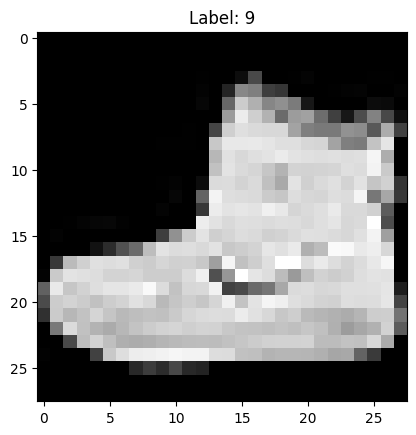

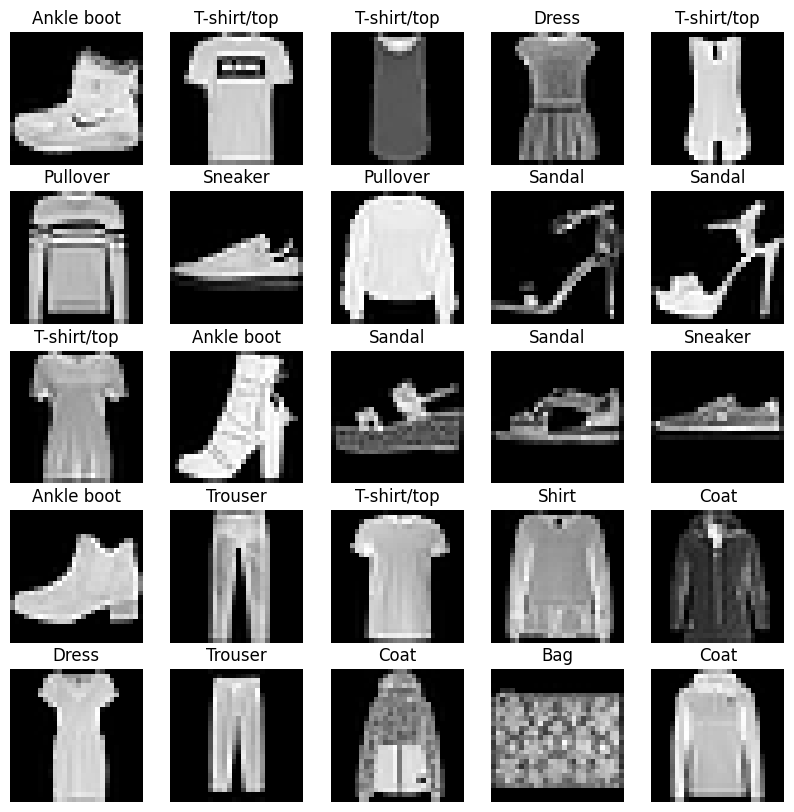

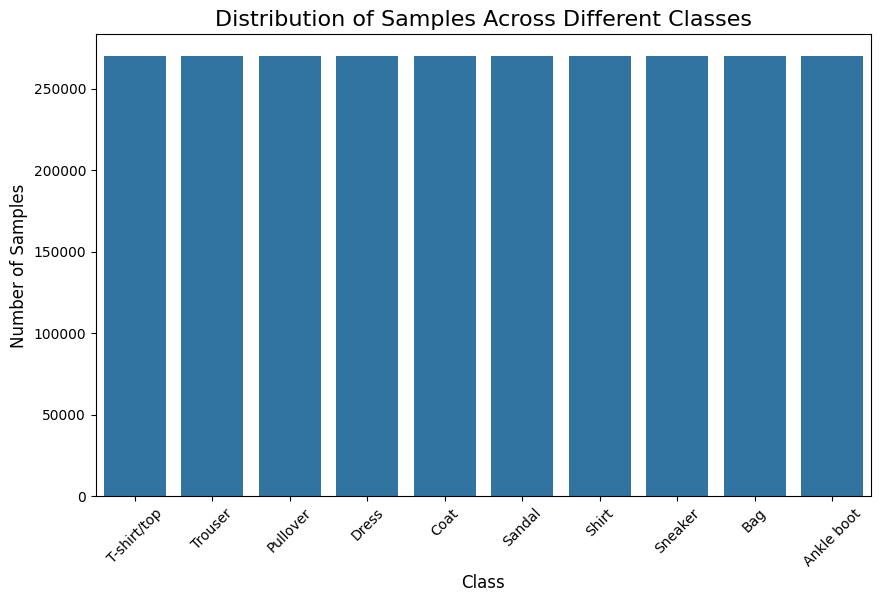

In [ ]:
# Load the Fashion MNIST dataset from Keras
# The dataset is split into training and testing sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Explore the shape of the data to understand its structure
# x_train and x_test contain the image data
# y_train and y_test contain the corresponding labels (class indices)
print("\nTraining data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

# Example: Let's print out the first training image and its label
plt.imshow(x_train[0], cmap='gray')  # Display the first training image in grayscale
plt.title(f"Label: {y_train[0]}")    # Display the label of the image
plt.show()
print()

# The dataset consists of 10 classes, and each image is 28x28 pixels
# The class labels are integers from 0 to 9, representing the following classes:
# 0: T-shirt/top, 1: Trouser, 2: Pullover, 3: Dress, 4: Coat
# 5: Sandal, 6: Shirt, 7: Sneaker, 8: Bag, 9: Ankle boot

# Let's display a sample of images and their corresponding class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))  # Create a 10x10 grid to display images
for i in range(25):  # Show the first 25 images
    plt.subplot(5, 5, i + 1)  # Create 5 rows and 5 columns of subplots
    plt.imshow(x_train[i], cmap='gray')  # Display the image
    plt.title(class_names[y_train[i]])  # Display the corresponding class label
    plt.axis('off')  # Turn off axis for clarity
plt.show()

print()
# 2. Bar Chart Showing the Distribution of Samples Across Different Classes
# We will count the occurrences of each class label in the training data
class_counts = np.sum(y_train, axis=0)  # Sum along axis 0 to count each class label

# Create a bar chart to show the distribution of classes
plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=class_counts)  # Use seaborn to create the bar chart
plt.title('Distribution of Samples Across Different Classes', fontsize=16)  # Title of the plot
plt.xlabel('Class', fontsize=12)  # Label for the x-axis
plt.ylabel('Number of Samples', fontsize=12)  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Data Preprocessing:

#### Preprocess the data as needed for training an ANN. This may include scaling the pixel values to a range between 0 and 1 and reshaping the data.

In [ ]:
# Reshape the data and scale the pixel values

# Reshaping the input data to add a channel dimension (required for ANN input)
# Fashion MNIST images are 28x28 pixels, with only 1 color channel (grayscale)
# We reshape the data to (num_samples, 28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Scaling the pixel values to be between 0 and 1
# Pixel values range from 0 to 255, so we divide by 255 to scale them down
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert the labels to one-hot encoded format
# Fashion MNIST has 10 classes, so we convert the labels into a 10-element vector (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Check the shape of the processed data
print("Training data shape after reshaping and scaling:", x_train.shape)
print("Testing data shape after reshaping and scaling:", x_test.shape)
print("Training labels shape after one-hot encoding:", y_train.shape)
print("Testing labels shape after one-hot encoding:", y_test.shape)



Training data shape after reshaping and scaling: (60000, 28, 28, 1)
Testing data shape after reshaping and scaling: (10000, 28, 28, 1)
Training labels shape after one-hot encoding: (60000, 10)
Testing labels shape after one-hot encoding: (10000, 10)


## Build an Artificial Neural Network:

#### Design and implement an ANN model for classifying Fashion MNIST images. Experiment with different architectures, activation functions, and layer configurations.

In [ ]:
# Build the Artificial Neural Network (ANN) model
# Initialize the model as a Sequential model (stack of layers)
model = Sequential([

    # Flatten layer: Flatten the input 28x28 image into a 1D array of 784 pixels
    Flatten(input_shape=(28, 28)),  # Input shape for Fashion MNIST images (28x28 pixels)

    # Dense layer: Fully connected layer with 512 neurons, ReLU activation, and L2 regularization
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),  # First hidden layer
    Dropout(0.5),  # Dropout layer: Randomly set 40% of the input units to 0 for regularization

    # Dense layer: Fully connected layer with 256 neurons and ReLU activation
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),  # Second hidden layer
    Dropout(0.4),  # Dropout layer: Randomly set 30% of the input units to 0 for regularization

    # Dense layer: Fully connected layer with 64 neurons and ReLU activation
    # This layer is used as a bottleneck, reducing the dimensionality before expanding again
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),  # Bottleneck layer
    # No Dropout here to allow the model to learn low-level features better

    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),  # Bottleneck layer

    # Dense layer: Fully connected layer with 128 neurons, using LeakyReLU activation
    # LeakyReLU is used to allow small negative values for the neurons to have some gradient
    Dense(128, activation=LeakyReLU(alpha=0.01), kernel_regularizer=l2(0.001)),  # Fourth hidden layer
    Dropout(0.4),  # Dropout layer: Randomly set 30% of the input units to 0 for regularization

    # Output layer: Fully connected layer with 10 neurons (one for each class), using softmax for classification
    Dense(10, activation='softmax')  # Output layer for 10 classes, softmax converts to probability
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


## Compile the Model:

#### Compile the ANN model using an appropriate loss function, optimizer, and evaluation metric. Choose metrics such as accuracy to monitor during training.

In [ ]:
# Compile the model
# Using Adam optimizer, sparse categorical crossentropy loss (since labels are integers), and accuracy as the metric

model.compile(
    optimizer=Adam(learning_rate=0.001),                    # Adam optimizer adapts the learning rate during training
    loss='categorical_crossentropy',      # Loss function for multi-class classification
    metrics=['accuracy']                 # Metric to monitor during training
)

# Summarize the model architecture
model.summary()



Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 557,290 (2.13 MB)

 Trainable params: 557,290 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

## Train the Model:

#### Train the compiled model on the training set. Monitor and visualize the training process using training loss and accuracy.

In [ ]:
# Early stopping is used to prevent overfitting by stopping the training if the validation loss does not improve for 3 consecutive epochs.
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3, min_lr=1e-6)

# 2. Train the Model
# We use 20% of the training data as validation data to monitor the model's performance on unseen data during training.
history = model.fit(
    x_train,                # Training data
    y_train,                # Training labels
    epochs=50,              # Maximum number of epochs
    batch_size=64,          # Number of samples per batch
    validation_split=0.2,   # Reserve 20% of the training data for validation
    callbacks=[early_stopping, lr_scheduler]  # Use early stopping as a callback
)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.5837 - loss: 1.7764 - val_accuracy: 0.8148 - val_loss: 0.8339 - learning_rate: 0.0010
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.7987 - loss: 0.8691 - val_accuracy: 0.8365 - val_loss: 0.6889 - learning_rate: 0.0010
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.8071 - loss: 0.7778 - val_accuracy: 0.8444 - val_loss: 0.6294 - learning_rate: 0.0010
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.8169 - loss: 0.7128 - val_accuracy: 0.8453 - val_loss: 0.6162 - learning_rate: 0.0010
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8161 - loss: 0.7028 - val_accuracy: 0.8392 - val_loss: 0.6133 - learning_rate: 0.0010
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.8229 - loss: 0.6914 - val_accuracy: 0.8349 - val_loss: 0.6197 - learning_rate: 0.0010
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8187 - l

In [ ]:
history.params

{'verbose': 'auto', 'epochs': 50, 'steps': 750}

In [ ]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss,learning_rate
0,0.703646,1.300376,0.814833,0.833941,1.000000e-03
1,0.800104,0.842076,0.836500,0.688861,1.000000e-03
2,0.809125,0.759326,0.844417,0.629378,1.000000e-03
3,0.816521,0.710615,0.845250,0.616217,1.000000e-03
4,0.818313,0.697668,0.839167,0.613270,1.000000e-03
5,0.820896,0.691406,0.834917,0.619680,1.000000e-03
6,0.819229,0.683527,0.848917,0.582953,1.000000e-03
7,0.818604,0.677570,0.845250,0.590944,1.000000e-03
8,0.821979,0.671471,0.848083,0.585018,1.000000e-03
9,0.822167,0.668180,0.850750,0.579422,1.000000e-03


## Evaluate the Model:

#### Evaluate the trained model on the validation set. Calculate and visualize both training and validation losses and accuracy.

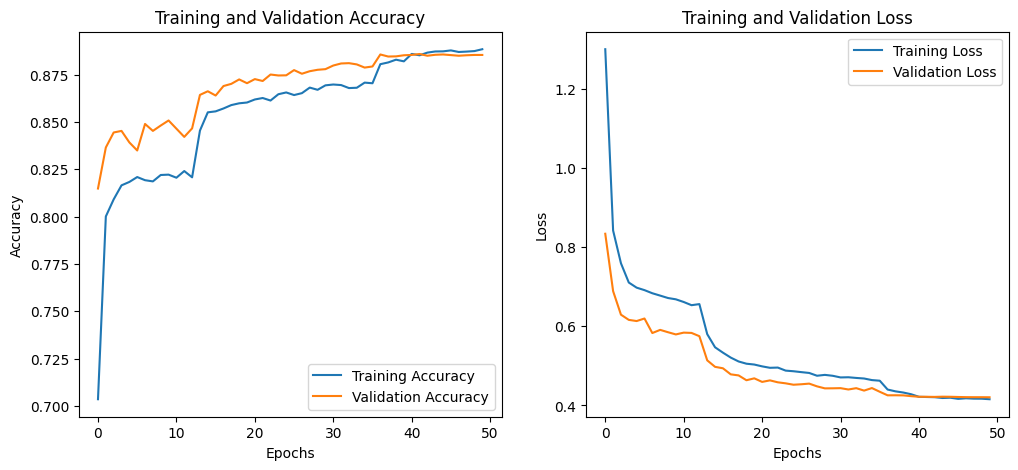


Final Training Accuracy: 0.8884
Final Validation Accuracy: 0.8853
Final Training Loss: 0.4157
Final Validation Loss: 0.4206
313/313 - 1s - 3ms/step - accuracy: 0.8784 - loss: 0.4453

Test Accuracy: 87.84%


In [ ]:
# 3. Visualize the Training Process
# Plot training and validation accuracy over epochs
plt.figure(figsize=(12, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Display final training and validation accuracy and loss values
print(f"\nFinal Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")

# Evaluate on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest Accuracy: {test_acc*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


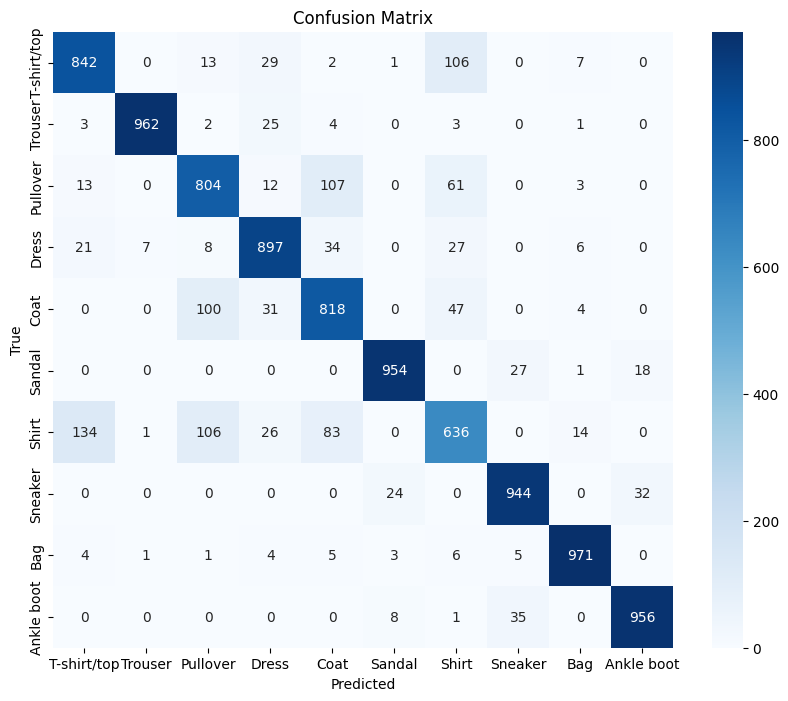

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Test Set Prediction:

#### Use the trained model to predict classes for the test set. Display a few sample predictions along with the corresponding images.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


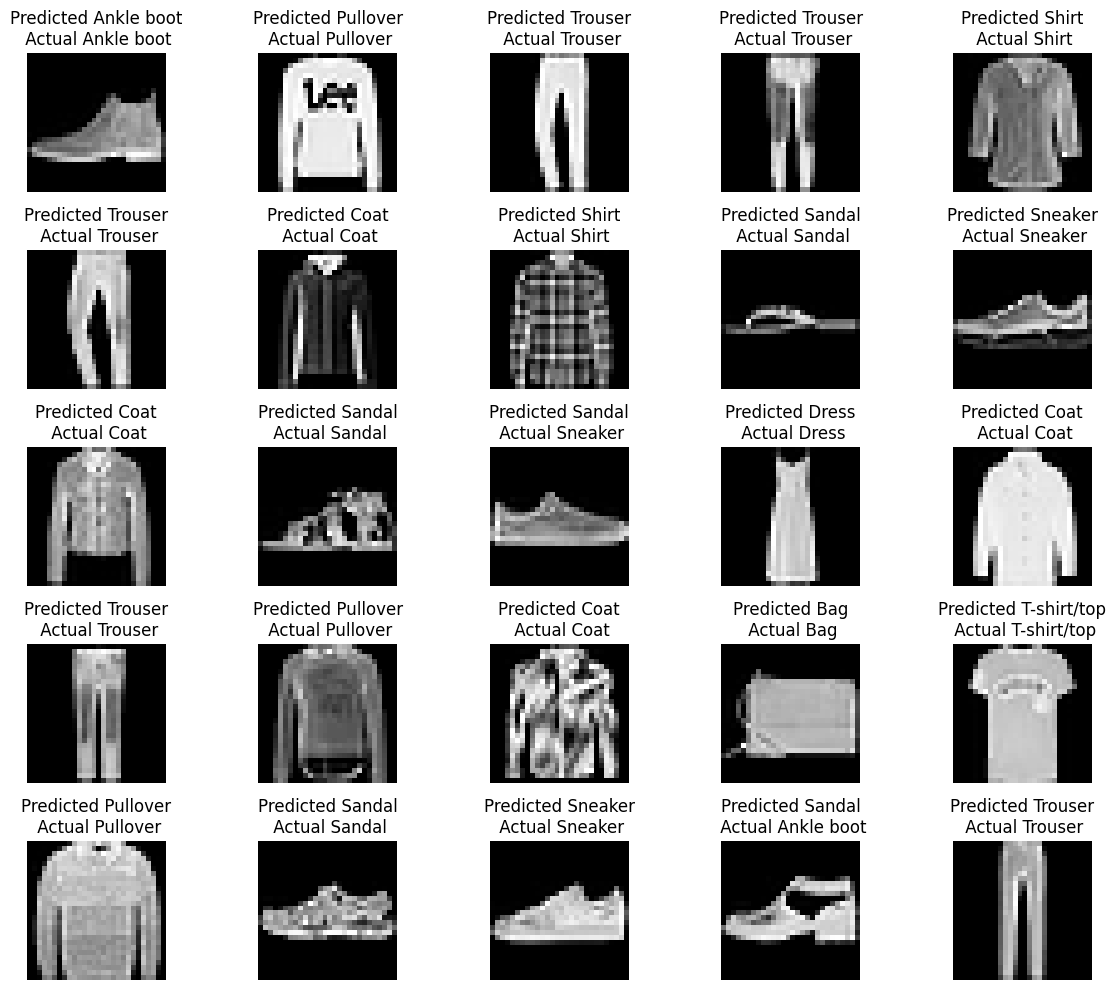

In [ ]:
# 1. Make Predictions on the Test Set
# Use the model to predict the class probabilities for the test set
test_predictions = model.predict(x_test)

# Convert the predicted probabilities to class labels by selecting the class with the highest probability
predicted_classes = np.argmax(test_predictions, axis=1)

# 2. Display Sample Predictions
# Define the class names corresponding to the labels in Fashion MNIST
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Plot a few sample images from the test set along with their predicted and true labels
plt.figure(figsize=(12, 10))

# Display 9 sample images with predictions
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')  # Display the image in grayscale
    actual_label = class_names[np.argmax(y_test[i])]  # Get the true class name
    predicted_label = class_names[predicted_classes[i]]  # Get the predicted class name
    plt.title(f"Predicted {predicted_label}\n Actual {actual_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()
